In [1]:
#conda create -n numpy python altair vega_datasets notebook vega networkx nx_altair matplotlib
#https://altair-viz.github.io/getting_started/installation.html
import networkx as nx
import pandas as pd
import nx_altair as nxa
import altair as alt
alt.renderers.enable('notebook')
%matplotlib inline

In [2]:
triplets = pd.read_csv('../data/processed/2015-01-01/triplets.csv')
repos = pd.read_csv('../data/processed/2015-01-01/repos.csv')
users = pd.read_csv('../data/processed/2015-01-01/users.csv')

In [3]:
triplets.head()

,user_id,user_name,event_type,repo_id,repo_name
0,9152315,davidjhulse,PushEvent,28635890,davidjhulse/davesbingrewardsbot
1,5581438,jmoon018,PushEvent,26392647,jmoon018/rshell-unit-tester
2,6352424,christoferpeterson,CreateEvent,28677542,christoferpeterson/Vadek
3,66577,JakeWharton,PushEvent,5152285,square/okhttp
4,9221683,git4ruby,PushEvent,28520835,git4ruby/movie_review1


In [4]:
repos.head()

,repo_id,repo_name,CheckRunEvent,CheckSuiteEvent,CommitCommentEvent,ContentReferenceEvent,CreateEvent,DeleteEvent,DeployKeyEvent,DeploymentEvent,...,RepositoryDispatchEvent,RepositoryEvent,RepositoryImportEvent,RepositoryVulnerabilityAlertEvent,SecurityAdvisoryEvent,StarEvent,StatusEvent,TeamEvent,TeamAddEvent,WatchEvent
0,27,rubinius/rubinius,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,28,mojombo/god,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,68,macournoyer/thin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,144,mojombo/chronic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,426,haml/haml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
users.head()

,user_id,user_name,CheckRunEvent,CheckSuiteEvent,CommitCommentEvent,ContentReferenceEvent,CreateEvent,DeleteEvent,DeployKeyEvent,DeploymentEvent,...,RepositoryDispatchEvent,RepositoryEvent,RepositoryImportEvent,RepositoryVulnerabilityAlertEvent,SecurityAdvisoryEvent,StarEvent,StatusEvent,TeamEvent,TeamAddEvent,WatchEvent
0,7.0,evanphx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78.0,indirect,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,willcodeforfoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,118.0,peterc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,129.0,canadaduane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
watch_events = triplets[triplets.event_type == 'WatchEvent']

In [7]:
watch_events.head()

,user_id,user_name,event_type,repo_id,repo_name
65,642929,jchristi,WatchEvent,18297319,LinuxStandardBase/lsb
72,1405427,tategakibunko,WatchEvent,28229924,inf0rmer/blanket
91,1429402,alfateam123,WatchEvent,28676020,parrt/cs652
119,7419955,senthilnathansk,WatchEvent,26649719,Pathgather/please-wait
149,4693056,teamcrisis,WatchEvent,24036844,jtsternberg/Shortcode_Button


In [8]:
user_id_name_mapping = {}


In [9]:
#Get star count of each repo
repo_star_count = watch_events.groupby(['repo_id'])[['repo_id']].count()
repo_star_count = repo_star_count.rename(columns = {'repo_id': 'count'})\
                                 .reset_index()
repo_star_count = repo_star_count.sort_values('count', ascending = False)

In [10]:
#Get top 5 star count repos
top_5_repos = repo_star_count.iloc[:5]['repo_id'].tolist()
top_5_repos

[26689598, 26730195, 28428729, 26153532, 20787122]

In [11]:
#Get all watch events that involve top 5 star count repo
watch_events_top_5_repos = watch_events[watch_events['repo_id'].isin(top_5_repos)]

In [12]:
#Make nx.Graph object for star event
#Add edges   
G = nx.from_pandas_edgelist(watch_events_top_5_repos, 
                            source = 'user_id', 
                            target = 'repo_id', 
                            create_using = nx.Graph())

#Make node attributes (node_type, name, number of edges)
for repo_id in watch_events_top_5_repos['repo_id'].unique().tolist():
    G.add_node(repo_id, node_type = 'repository', name = repos[repos.repo_id == repo_id]['repo_name'].iloc[0], 
               color = '#1f77b4ff')
for user_id in watch_events_top_5_repos['user_id'].unique().tolist():
    G.add_node(user_id, node_type = 'user', name = users[users.user_id == user_id]['user_name'].iloc[0], 
              color = '#ff7f0eff')
for node in G.nodes:
    G.nodes[node]['num_stars'] = G.degree[node]


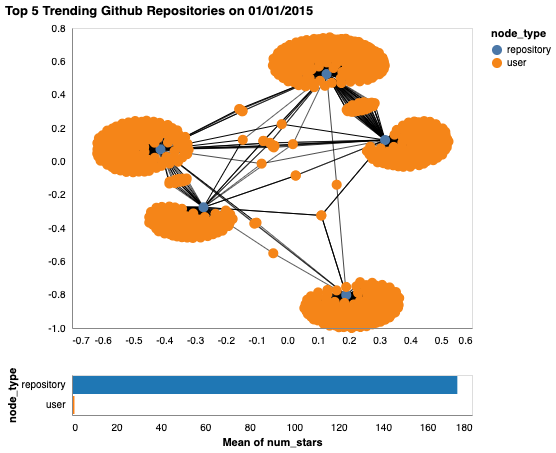

In [13]:
pos = nx.spring_layout(G)

chart = nxa.draw_networkx(
    G = G,
    pos = pos,
    node_size = 100,
    node_tooltip = ['node_type', 'name', 'num_stars']
)

brush = alt.selection_interval(encodings = ['x', 'y'])
# color = alt.Color('color:N', scale = None)
edges = chart.layer[0]
nodes = chart.layer[1]

nodes = nodes.encode(
    fill = alt.condition(brush, 'node_type:N', alt.value("gray"))
).add_selection(
    brush
)

bars = alt.Chart(nodes.data).mark_bar().encode(
    x = 'mean(num_stars):Q',
    y = 'node_type:N',
    color = alt.Color('color:N', scale = None)
).transform_filter(
    brush
)

edges_nodes = edges + nodes
combined =  edges_nodes & bars    
combined = combined.properties(
    title='Top 5 Trending Github Repositories on 01/01/2015'
).configure_axis(grid = False, tickOpacity = 0)

combined

This graph shows that the top 5 trending repos on 2015-01-01 share very few users in common. Evidence of cliques. Unfortunately cannot seem to remove the x and y values from the actual network plot, since we can only do configurations from the top level (i.e. removing them from both plots).